<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/04/04_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

## decision boundary

In [ ]:
X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=1)

In [ ]:
artificial_df = pd.DataFrame(data=X, columns=['Feature 1', 'Feature 2'])

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

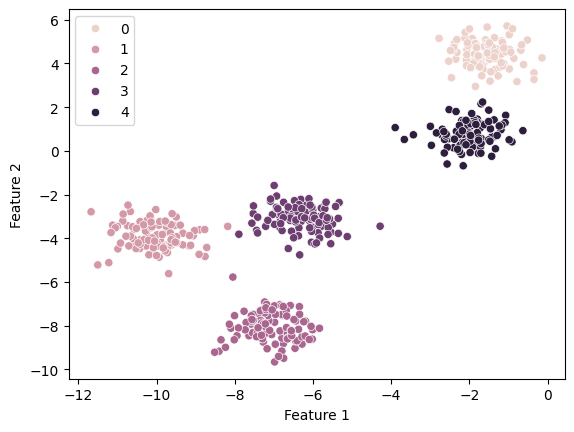

In [ ]:
sns.scatterplot(artificial_df, x='Feature 1', y='Feature 2', hue=y_true)

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

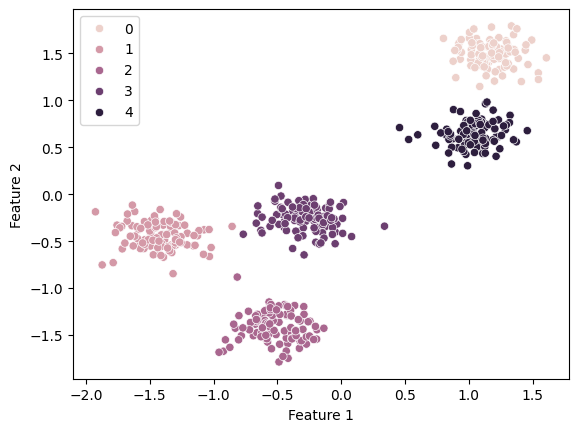

In [ ]:
standard_scaler = StandardScaler()
artificial_df = standard_scaler.fit_transform(artificial_df)
artificial_df = pd.DataFrame(
    data=artificial_df,
    columns=['Feature 1', 'Feature 2']
)

sns.scatterplot(artificial_df, x='Feature 1', y='Feature 2', hue=y_true)

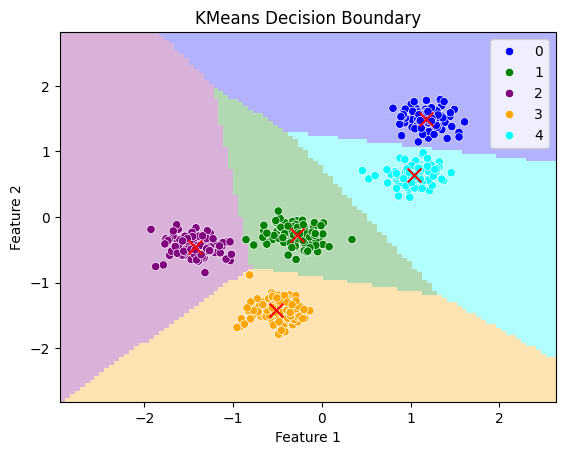

In [ ]:
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=0)
kmeans.fit(artificial_df)

cmap = ["blue", "green", "purple", "orange", "cyan"]

fig, ax = plt.subplots()

DecisionBoundaryDisplay.from_estimator(
    kmeans, artificial_df, plot_method="pcolormesh", response_method='predict',
    cmap=ListedColormap(cmap), alpha=0.3, ax=ax)

sns.scatterplot(artificial_df, x='Feature 1', y='Feature 2', hue=kmeans.labels_, palette=cmap, ax=ax)

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, marker='x')

ax.set_title('KMeans Decision Boundary')
plt.show()